<a href="https://colab.research.google.com/github/kgwxf/Squatscounter/blob/master/Squats_counter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')
# function ConnectButton(){
#     console.log("Connect pushed"); 
#     document.querySelector("#connect").click() 
# }
# setInterval(ConnectButton,60000);

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/CMU-Perceptual-Computing-Lab/openpose.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # install new CMake becaue of CUDA10
  !wget -q https://cmake.org/files/v3.13/cmake-3.13.0-Linux-x86_64.tar.gz
  !tar xfz cmake-3.13.0-Linux-x86_64.tar.gz --strip-components=1 -C /usr/local
  # clone openpose
  !git clone -q --depth 1 $git_repo_url
  !sed -i 's/execute_process(COMMAND git checkout master WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/execute_process(COMMAND git checkout f019d0dfe86f49d1140961f8c7dec22130c83154 WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/g' openpose/CMakeLists.txt
  # install system dependencies
  !apt-get -qq install -y libatlas-base-dev libprotobuf-dev libleveldb-dev libsnappy-dev libhdf5-serial-dev protobuf-compiler libgflags-dev libgoogle-glog-dev liblmdb-dev opencl-headers ocl-icd-opencl-dev libviennacl-dev
  # install python dependencies
  !pip install -q youtube-dl
  # build openpose
  !cd openpose && rm -rf build || true && mkdir build && cd build && cmake .. && make -j`nproc`
  
from IPython.display import YouTubeVideo

Selecting previously unselected package libgflags2.2.
(Reading database ... 145674 files and directories currently installed.)
Preparing to unpack .../00-libgflags2.2_2.2.1-1_amd64.deb ...
Unpacking libgflags2.2 (2.2.1-1) ...
Selecting previously unselected package libgflags-dev.
Preparing to unpack .../01-libgflags-dev_2.2.1-1_amd64.deb ...
Unpacking libgflags-dev (2.2.1-1) ...
Selecting previously unselected package libgoogle-glog0v5.
Preparing to unpack .../02-libgoogle-glog0v5_0.3.5-1_amd64.deb ...
Unpacking libgoogle-glog0v5 (0.3.5-1) ...
Selecting previously unselected package libgoogle-glog-dev.
Preparing to unpack .../03-libgoogle-glog-dev_0.3.5-1_amd64.deb ...
Unpacking libgoogle-glog-dev (0.3.5-1) ...
Selecting previously unselected package libhdf5-serial-dev.
Preparing to unpack .../04-libhdf5-serial-dev_1.10.0-patch1+docs-4_all.deb ...
Unpacking libhdf5-serial-dev (1.10.0-patch1+docs-4) ...
Selecting previously unselected package libleveldb1v5:amd64.
Preparing to unpack ...

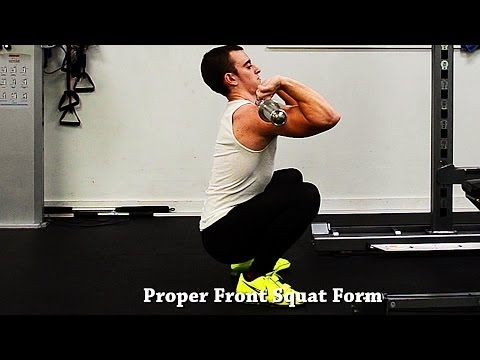

In [0]:
YOUTUBE_ID = 'wyDbagKS7Rg'


YouTubeVideo(YOUTUBE_ID)

In [0]:
!rm -rf youtube.mp4
!youtube-dl -f 'bestvideo[ext=mp4]' --output "youtube.%(ext)s" https://www.youtube.com/watch?v=$YOUTUBE_ID
!ffmpeg -y -loglevel info -ss 00:01:41 -i youtube.mp4 -to 00:01:51 video.mp4
!rm openpose.avi
!cd openpose && ./build/examples/openpose/openpose.bin --video ../video.mp4 --write_json ./output/ --display 0  --write_video ../openpose.avi
!ffmpeg -y -loglevel info -i openpose.avi output.mp4

[youtube] wyDbagKS7Rg: Downloading webpage
[youtube] wyDbagKS7Rg: Downloading video info webpage
[download] Destination: youtube.mp4
[download] 100% of 9.29MiB in 00:00
ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libss

In [0]:
def show_local_mp4_video(file_name, width=640, height=480):
  import io
  import base64
  from IPython.display import HTML
  video_encoded = base64.b64encode(io.open(file_name, 'rb').read())
  return HTML(data='''<video width="{0}" height="{1}" alt="test" controls>
                        <source src="data:video/mp4;base64,{2}" type="video/mp4" />
                      </video>'''.format(width, height, video_encoded.decode('ascii')))

show_local_mp4_video('output.mp4', width=960, height=720)

In [0]:
import json
import glob
c=0
listoffile = glob.glob("/content/openpose/output/*.json")
for eachfile in listoffile:
  # print(eachfile)
  jsonfile = open(eachfile, 'r')
  jsonobj = json.load(jsonfile)

  if (len(jsonobj["people"]))>0:
    Allkeypts = jsonobj["people"][0]["pose_keypoints_2d"]

    HipY = Allkeypts[24]
    KneeY = Allkeypts[27]
    print(HipY, KneeY)
 



 




439.056 433.105
586.234 565.571
836.449 830.522
856.95 860.015
883.519 842.267
450.859 436.119
586.237 565.606
883.515 842.263
883.517 842.266
586.225 565.607
480.238 477.239
1216.1 1224.9
1224.88 1213.09
1233.75 1224.9
848.156 836.436
839.307 833.392
821.684 812.917
586.241 565.6
1269.04 1283.77
456.749 436.144
439.105 433.214
1269 1283.73
836.306 836.46
1239.65 1233.64
494.995 480.339
854.02 839.321
0 0
868.788 886.421
586.235 565.577
447.841 436.03
883.484 839.408
442.034 433.222
586.241 565.613
1239.65 1233.64
889.361 906.961
851.063 836.325
833.328 839.353
465.518 456.621
586.247 565.615
877.521 892.304
883.52 842.268
589.114 565.609
845.199 0
883.52 842.264
453.799 436.114
883.484 839.404
883.49 839.408
500.859 503.845
883.519 842.265
845.199 0
0 0
586.241 565.613
0 0
833.521 839.293
1269.01 1283.79
586.254 565.633
1251.41 1257.21
848.172 836.507
1239.63 1254.28
830.463 821.625
883.519 842.267
836.433 833.343
856.96 860.013
1239.65 1233.64
836.494 851.122
586.248 565.604
839.417 